In [297]:
from oracles import QuadraticOracle
import numpy as np
from plot_trajectory_2d import plot_levels, plot_trajectory
from optimization import newton, gradient_descent
import oracles
import plotly.graph_objects as go
import scipy

import plotly.express as px
import plotly
from IPython.display import display, HTML

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

%reload_ext autoreload
%autoreload 2

# 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

### Вульф, хорошо обусловленная матрица, рандомная начальная точка

In [161]:
A1 = np.array([
    [3, 0],
    [0, 4]
])
b1 = np.array([1, 1])
oracle = oracles.QuadraticOracle(A1, b1)

In [162]:
x, mes, hist = gradient_descent(oracle, np.array([3, 6]), trace=True, tolerance=1e-9)

C:\Users\User\PycharmProjects\Optim_HSE\Lab1\plot_trajectory_2d.py:30: UserWarning:

The following kwargs were not used by contour: 'linewidth'



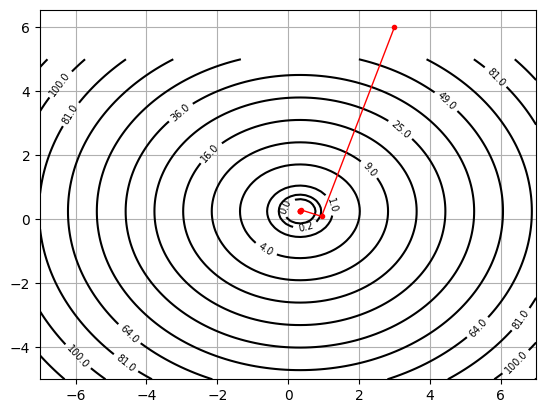

In [163]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

### Вульф, плохо обусловленная матрица, точка в каньоне

In [275]:
A2 = np.array([
    [3, 0],
    [0, 40]
])
b2 = np.array([1, 1])
oracle = oracles.QuadraticOracle(A2, b2)

In [290]:
x, mes, hist = gradient_descent(oracle, np.array([6, 0.6]), trace=True, tolerance=1e-9)

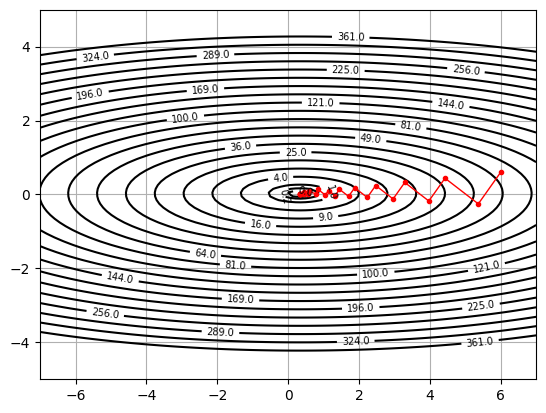

In [291]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

### Вульф, плохо обусловленная матрица, точка рандомная

In [272]:
A3 = np.array([
    [3, 0],
    [0, 40]
])
b3 = np.array([1, 1])
oracle = oracles.QuadraticOracle(A3, b3)

In [273]:
x, mes, hist = gradient_descent(oracle, np.array([6, 4]), trace=True, tolerance=1e-9)

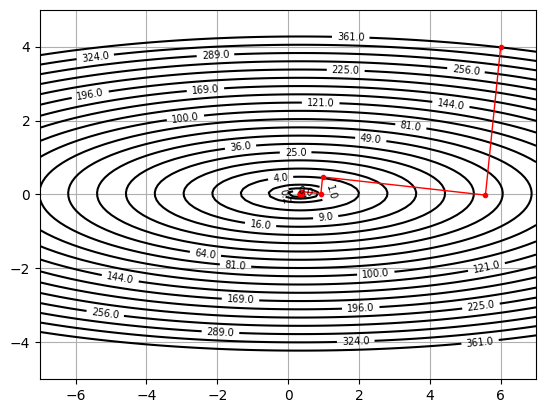

In [274]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

### Армихо, Хорошая обучловленность, случайная точка

In [192]:
A1 = np.array([
    [3, 0],
    [0, 4]
])
b1 = np.array([1, 1])
oracle = oracles.QuadraticOracle(A1, b1)

In [199]:
x, mes, hist = gradient_descent(oracle, np.array([3, 6]), trace=True, line_search_options={'method': 'Armijo'}, tolerance=1e-9)

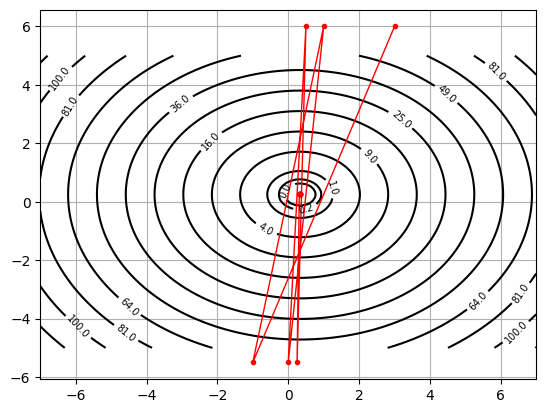

In [200]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

In [197]:
x, mes, hist = gradient_descent(oracle, np.array([3, 6]), trace=True, line_search_options={'method': 'Armijo', 'c1': 0.1}, tolerance=1e-9)

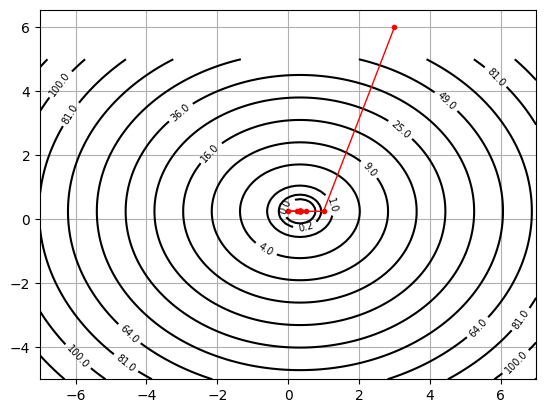

In [198]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

### Константный шаг, Хорошая обучловленность, случайная точка

In [148]:
A1 = np.array([
    [3, 0],
    [0, 4]
])
b1 = np.random.rand(2)
oracle = oracles.QuadraticOracle(A1, b1)

In [150]:
x, mes, hist = gradient_descent(oracle, np.array([3, 6]), trace=True, tolerance=1e-9, line_search_options={'method': 'Constant', 'c': 0.1})

C:\Users\User\PycharmProjects\Optim_HSE\Lab1\plot_trajectory_2d.py:30: UserWarning:

The following kwargs were not used by contour: 'linewidth'



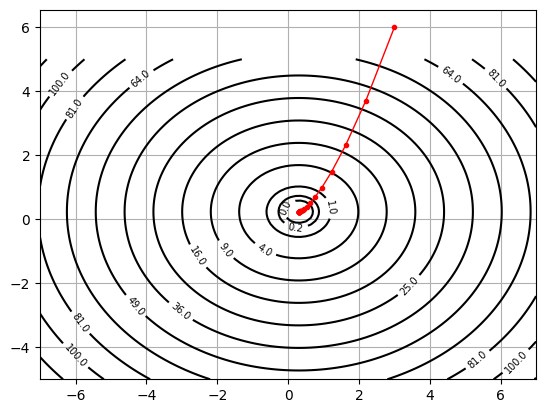

In [151]:
plot_levels(oracle.func)
plot_trajectory(oracle.func, hist['x'])

In [152]:
hist['grad']

[24.432532901296984,
 24.432532901296984,
 14.94746545333764,
 9.19842218166158,
 5.701477967652302,
 3.5644702472851906,
 2.2506493292065652,
 1.4367908651004981,
 0.9279936851247306,
 0.6064997314461719,
 0.40094244659384964,
 0.2678699371371708,
 0.1806488388996795,
 0.1228065285646237,
 0.08403920996130416,
 0.057817245379509545,
 0.0399445630535237,
 0.027686765907645922,
 0.01923837933734424,
 0.013393181013675858,
 0.009337150248478638,
 0.00651635352326304,
 0.004551314408606314,
 0.003180698719389865,
 0.0022238000013415546,
 0.0015552755822919445,
 0.0010879803708127177,
 0.0007612196038189744]

# 3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространст

### Вульф

In [19]:
ns = [2, 10, 100, 1000, 10000]
colors = px.colors.qualitative.Set1[0:3] + px.colors.qualitative.Set1[5:7]
ks = np.linspace(start=1, stop=1000)
nums = 20
Wdict_n = {i: [] for i in ns}

In [20]:
for i, n in enumerate(ns):
    for num in range(nums):
        list_for_n = []
        for k in ks:
            x_0 = np.random.randn(n)*3 + np.array([13] * n)
            diagonal = np.concatenate((np.array([1]), np.random.randint(low=1, high=k+1, size=n-2), np.array([k]))) / k
            A = scipy.sparse.diags(diagonal)
            b = np.random.randn(n)
            oracle = oracles.QuadraticOracle(A, b)
            x_star, mess, hist = gradient_descent(oracle, x_0, trace=True, tolerance=1e-9)
            list_for_n.append(len(hist['grad']))
        Wdict_n[n].append(list_for_n)

C:\Users\User\PycharmProjects\Optim_HSE\Lab1\optimization.py:82: LineSearchWarning:

The line search algorithm did not converge



In [21]:
Warr_2 = np.array(Wdict_n[2])
Warr_10 = np.array(Wdict_n[10])
Warr_100 = np.array(Wdict_n[100])
Warr_1000 = np.array(Wdict_n[1000])
Warr_10000 = np.array(Wdict_n[10000])
Wlist_arrs = [Warr_2, Warr_10, Warr_100, Warr_1000, Warr_10000]
# arr = arr.mean(axis=0)
# len(ks), arr.shape

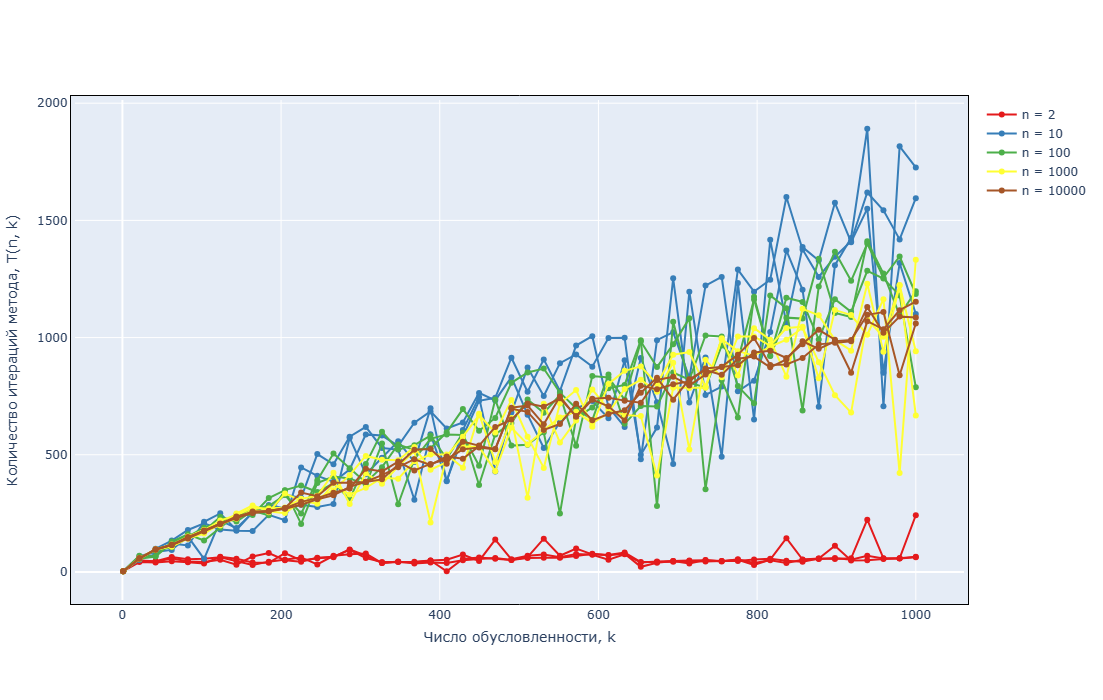

In [302]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
     title = r"Число итераций GD для стратегии Вульфа",
    title_x=0.5,
    xaxis_title="Число обусловленности, k",
    yaxis_title="Количество итераций метода, T(n, k)"
)

fig = go.Figure(layout=layout)
def plot_line(fig, arr, color, n):
    for j in [3, 9, 18]:
        if j != 3:
            fig.add_trace(go.Scatter(x=ks, y=arr[j],
                            mode='lines+markers',
                            name=str(n),
                            line_color=color,
                            showlegend=False))
        else:
            fig.add_trace(go.Scatter(x=ks, y=arr[j],
                            mode='lines+markers',
                            name='n = '+str(n),
                            line_color=color,
                            showlegend=True))
for i, (n, arr) in enumerate(zip(ns, Wlist_arrs)): 
    plot_line(fig, arr, colors[i], n)
fig.show()

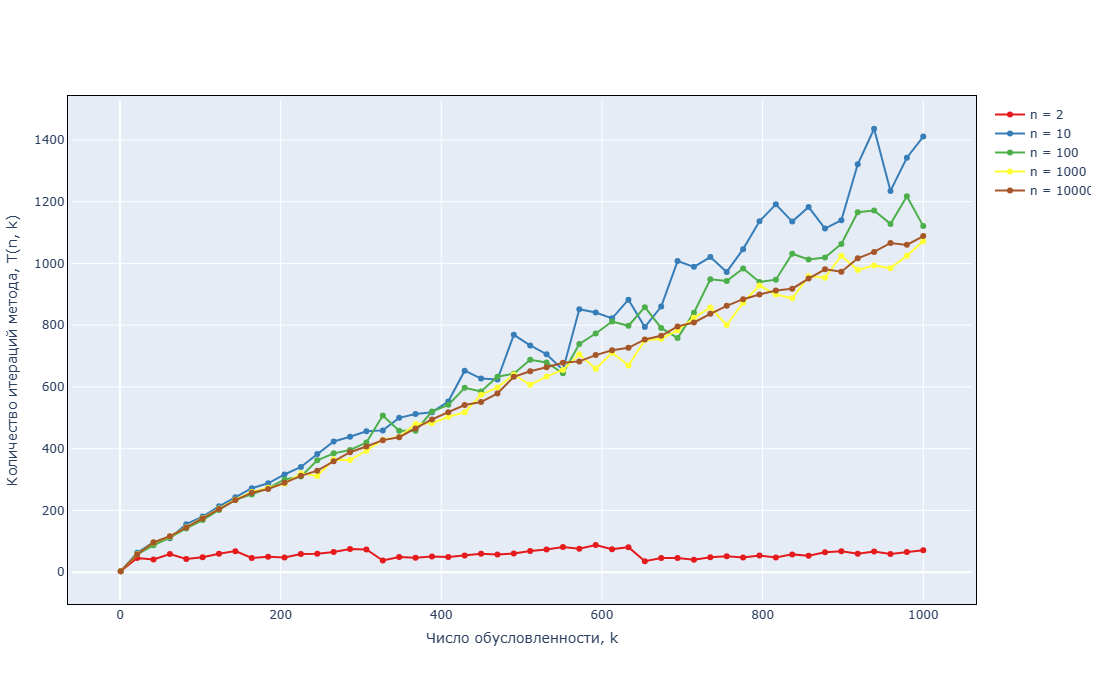

In [23]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
     title = r"Среднее число итераций GD для константной стратегии",
    xaxis_title="Число обусловленности, k",
    yaxis_title="Количество итераций метода, T(n, k)"
)

fig = go.Figure(layout=layout)
def plot_line_1(fig, arr, color, n):
    fig.add_trace(go.Scatter(x=ks, y=arr,
                            mode='lines+markers',
                            name='n = '+str(n),
                            line_color=color,
                            showlegend=True))
for i, (n, arr) in enumerate(zip(ns, Wlist_arrs)):
    Warr_95 = np.
    Warr = arr.mean(axis=0)
    plot_line_1(fig, Warr, colors[i], n)
fig.show()

### Константа

In [445]:
# ns = [2, 10, 100, 1000, 10000]
# colors = []
# ks = np.linspace(start=1, stop=1000)
# nums = 10
# Cdict_n = {i: [] for i in ns}

# for i, n in enumerate(ns):
#     x_0 = np.random.randn(n) * 10
#     for num in range(nums):
#         list_for_n = []
#         for k in ks:
#             diagonal = np.concatenate((np.array([1]), np.random.randint(low=1, high=k+1, size=n-2), np.array([k]))) /  k
#             A = scipy.sparse.diags(diagonal)
#             b = np.random.randn(n)
#             oracle = oracles.QuadraticOracle(A, b)
#             x_star, mess, hist = gradient_descent(oracle, x_0, trace=True, line_search_options={'method': 'Constant', 'c': 0.7})
#             list_for_n.append(len(hist['grad']))
#         Cdict_n[n].append(list_for_n)

In [34]:
ns = [2, 10, 100, 1000, 10000]
colors = px.colors.qualitative.Set1[0:3] + px.colors.qualitative.Set1[5:7]
ks = np.linspace(start=1, stop=1000)
nums = 10
Cdict_n = {i: [] for i in ns}

In [35]:
for i, n in enumerate(ns):
    for num in range(nums):
        list_for_n = []
        for k in ks:
            x_0 = np.random.randn(n)*3 + np.array([13] * n)
            diagonal = np.concatenate((np.array([1]), np.random.randint(low=1, high=k+1, size=n-2), np.array([k]))) / k
            A = scipy.sparse.diags(diagonal)
            b = np.random.randn(n)
            oracle = oracles.QuadraticOracle(A, b)
            x_star, mess, hist = gradient_descent(oracle, x_0, trace=True, tolerance=1e-9, line_search_options={'method': 'Constant', 'c': 0.5})
            list_for_n.append(len(hist['grad']))
        Cdict_n[n].append(list_for_n)

In [36]:
Carr_2 = np.array(Cdict_n[2])
Carr_10 = np.array(Cdict_n[10])
Carr_100 = np.array(Cdict_n[100])
Carr_1000 = np.array(Cdict_n[1000])
Carr_10000 = np.array(Cdict_n[10000])
Clist_arrs = [Carr_2, Carr_10, Carr_100, Carr_1000, Carr_10000]
# arr = arr.mean(axis=0)
# len(ks), arr.shape

In [37]:
# layout = go.Layout(
#     autosize=False,
#     width=900,
#     height=700,
#     xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
#     yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
#     margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
# )

# fig = go.Figure(layout=layout)
# def plot_line(fig, arr, color, n):
#     for j in [3, 9, 18]:
#         if j != 3:
#             fig.add_trace(go.Scatter(x=ks, y=arr[j],
#                             mode='lines+markers',
#                             name=str(n),
#                             line_color=color,
#                             showlegend=False))
#         else:
#             fig.add_trace(go.Scatter(x=ks, y=arr[j],
#                             mode='lines+markers',
#                             name=str(n),
#                             line_color=color,
#                             showlegend=True))
# for i, (n, arr) in enumerate(zip(ns, Clist_arrs)): 
#     plot_line(fig, arr, colors[i], n)
# fig.show()

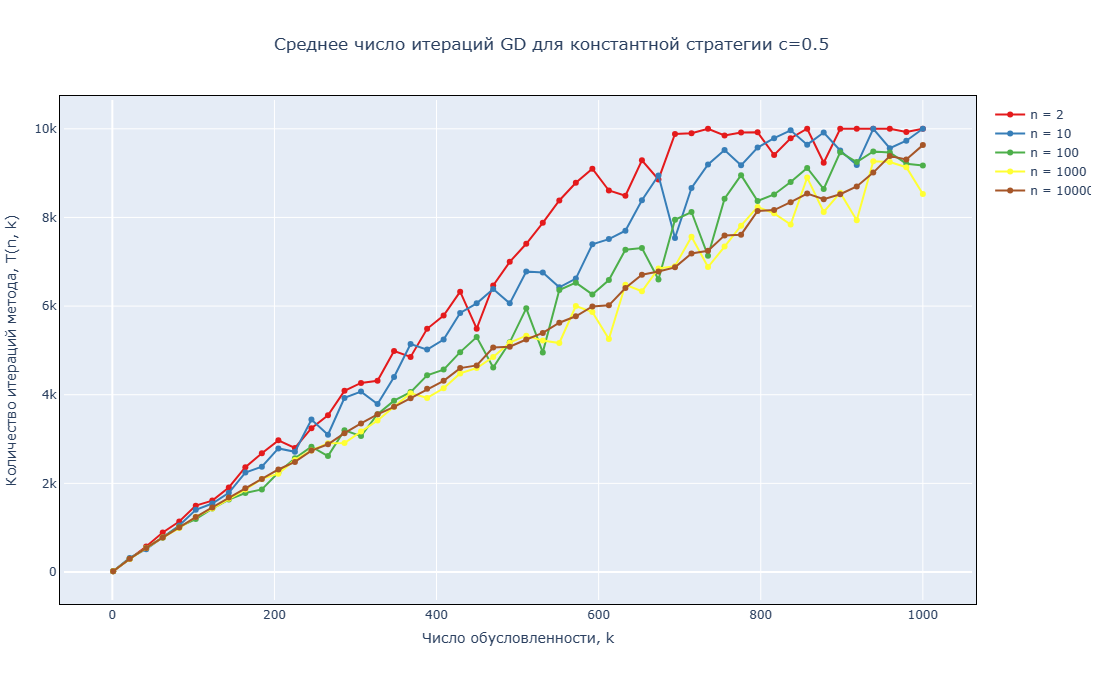

In [300]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    title = r"Среднее число итераций GD для константной стратегии",
    title_x=0.5,
    xaxis_title="Число обусловленности, k",
    yaxis_title="Количество итераций метода, T(n, k)"
)

fig = go.Figure(layout=layout)
def plot_line_1(fig, arr, color, n):
    fig.add_trace(go.Scatter(x=ks, y=arr,
                            mode='lines+markers',
                            name='n = '+str(n),
                            line_color=color,
                            showlegend=True))
for i, (n, arr) in enumerate(zip(ns, Clist_arrs)):
    Carr = arr.mean(axis=0)
    plot_line_1(fig, Carr, colors[i], n)
fig.show()

### Армихо

In [112]:
ns = [2, 10, 100, 1000, 10000]
colors = px.colors.qualitative.Set1[0:3] + px.colors.qualitative.Set1[5:7]
ks = np.linspace(start=1, stop=1000)
nums = 15
Adict_n = {i: [] for i in ns}

In [113]:
for i, n in enumerate(ns):
    for num in range(nums):
        list_for_n = []
        for k in ks:
            x_0 = np.random.randn(n)*3 + np.array([13] * n)
            diagonal = np.concatenate((np.array([1]), np.random.randint(low=1, high=k+1, size=n-2), np.array([k]))) / k
            A = scipy.sparse.diags(diagonal)
            b = np.random.randn(n)
            oracle = oracles.QuadraticOracle(A, b)
            x_star, mess, hist = gradient_descent(oracle, x_0, trace=True, line_search_options={'method': 'Armijo', 'c1': 0.7}, tolerance=1e-9)
            list_for_n.append(len(hist['grad']))
        Adict_n[n].append(list_for_n)

In [133]:
Aarr_2 = np.array(Adict_n[2])
Aarr_10 = np.array(Adict_n[10])
Aarr_100 = np.array(Adict_n[100])
Aarr_1000 = np.array(Adict_n[1000])
Aarr_10000 = np.array(Adict_n[10000])
Alist_arrs = [Aarr_2, Aarr_10, Aarr_100, Aarr_1000, Aarr_10000]
# arr = arr.mean(axis=0)
# len(ks), arr.shape

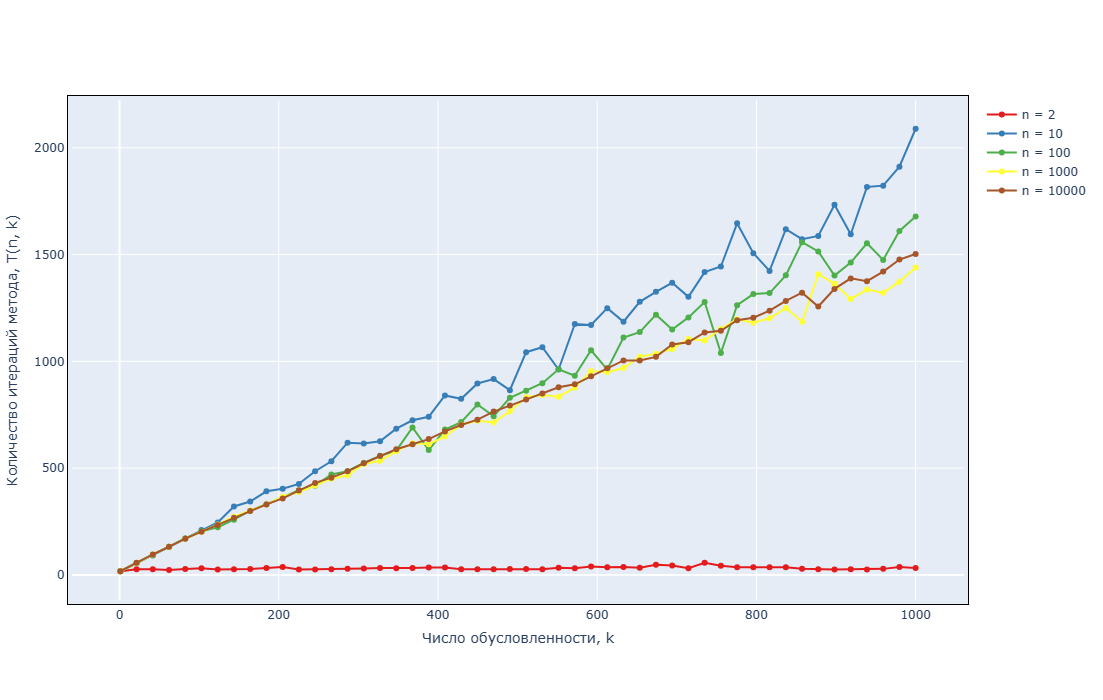

In [115]:
layout = go.Layout(
    autosize=False,
    width=900,
    height=700,
    xaxis=go.layout.XAxis(linecolor="black", linewidth=1, mirror=True),
    yaxis=go.layout.YAxis(linecolor="black", linewidth=1, mirror=True),
    margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
    title = "",
    xaxis_title="Число обусловленности, k",
    yaxis_title="Количество итераций метода, T(n, k)"
)

fig = go.Figure(layout=layout)
def plot_line_1(fig, arr, color, n):
    fig.add_trace(go.Scatter(x=ks, y=arr,
                            mode='lines+markers',
                            name='n = '+str(n),
                            line_color=color,
                            showlegend=True))
for i, (n, arr) in enumerate(zip(ns, Alist_arrs)):
    Aarr = arr.mean(axis=0)
    plot_line_1(fig, Aarr, colors[i], n)
fig.show()